# Kerr metric test
## 一下代码无法在黑洞自旋不为0的情况下计算出正确的轨迹，原因不明

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
M = 1  # Assuming a unit mass for simplicity, can be changed
epsilon = 1
a = 0 #设置a=0，即为S.W. metric

In [3]:
def derivatives(t, y):
    r, theta, phi, u1d, u2d, u3d = y


    u0 = np.sqrt(
         ((a**2 * np.cos(theta)**2 + r**2) *
         (a**2 * np.cos(theta)**2 * (a**2 + r * (r - 2 * M)) + a**2 * r * (2 * M + r) + r**4)) /
         (2 * a**2 * r**2 * np.cos(theta)**2 * (a**2 + 2 * M**2 - 2 * M * r + r**2) +
         r**2 * (-8 * a**2 * M**2 * np.cos(2 * theta) + a**2 * (4 * M**2 + r**2) + r**3 * (r - 2 * M)) +
         a**4 * np.cos(theta)**4 * (a**2 + r * (r - 2 * M)))) * \
         np.sqrt(
         ((u1d**2 * (a**2 - 2 * M * r + r**2) + u2d**2) / (a**2 * np.cos(theta)**2 + r**2) +
         u3d**2 * (1 / np.sin(theta)**2) / ((2 * M * r * (a**2 + r**2)) / (a**2 * np.cos(theta)**2 + r**2) +
         a**2 - 2 * M * r + r**2) + epsilon))

    # Provided equations
    dx1_dt = ((a**2 + r * (-2 * M + r)) * u1d) / (u0 * (r**2 + a**2 * np.cos(theta)**2))
    dx2_dt = u2d / (r**2 * u0 + a**2 * u0 * np.cos(theta)**2)
    dx3_dt = (a**2 * u3d * (1 / np.tan(theta))**2 + r * (-4 * a * M * u0 + r * u3d * (1 / np.sin(theta))**2)) / \
             (u0 * (r**4 + a**2 * r * (2 * M + r) + a**2 * (a**2 + r * (-2 * M + r)) * np.cos(theta)**2))
    du1d_dt = (1 / u0) * (
    (4 * r * (6 * M * r * u0**2 + a**2 * u1d**2 + r * (-2 * M + r) * u1d**2 + u2d**2)) / (a**2 + 2 * r**2 + a**2 * np.cos(2 * theta))**2 +
    (-6 * M * u0**2 + 2 * (M - r) * u1d**2) / (a**2 + 2 * r**2 + a**2 * np.cos(2 * theta)) -
    (8 * M * r * (r**2 * (-3 * M + r) + a**2 * (M + r)) * (2 * (a**2 + r**2) * u0 + a * u3d)**2) / ((a**2 + r * (-2 * M + r)) * (a**4 + 2 * r**4 + a**2 * r * (2 * M + 3 * r) + a**2 * (a**2 + r * (-2 * M + r)) * np.cos(2 * theta))**2) +
    (2 * M * (2 * (a**2 + r**2) * u0 + a * u3d) * (2 * (a**2 + r**2) * (a**4 + 2 * a**2 * r**2 + r**3 * (-4 * M + r)) * u0 + a * (a**4 - 2 * a**2 * r**2 + (4 * M - 3 * r) * r**3) * u3d)) / ((a**2 + r**2)**2 * (a**2 + r * (-2 * M + r)) * (a**4 + 2 * r**4 + a**2 * r * (2 * M + 3 * r) + a**2 * (a**2 + r * (-2 * M + r)) * np.cos(2 * theta))) +
    (r * u3d**2 * (1 / np.sin(theta))**2) / (a**2 + r**2)**2
     )
    du2d_dt =  (
    (u3d**2 * np.cos(theta) / np.sin(theta)**3) / (a**2 + r**2) +
    2 * a**2 * (
        -((6 * M * r * u0**2 + a**2 * u1d**2 + r * (-2 * M + r) * u1d**2 + u2d**2) /
          (a**2 + 2 * r**2 + a**2 * np.cos(2 * theta))**2) +
        (2 * M * r * (a**2 + r * (-2 * M + r)) * (2 * (a**2 + r**2) * u0 + a * u3d)**2) /
        ((a**2 + r**2) * (a**4 + 2 * r**4 + a**2 * r * (2 * M + 3 * r) +
         a**2 * (a**2 + r * (-2 * M + r)) * np.cos(2 * theta))**2)
    ) * np.sin(2 * theta)) / u0
    du3d_dt = 0
    return np.array([dx1_dt, dx2_dt, dx3_dt, du1d_dt, du2d_dt, du3d_dt])

In [4]:
def rk4_step(func, t, y, dt):
    k1 = func(t, y)
    k2 = func(t + 0.5*dt, y + 0.5*dt*k1)
    k3 = func(t + 0.5*dt, y + 0.5*dt*k2)
    k4 = func(t + dt, y + dt*k3)
    return y + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

In [5]:
#[4.20277, 1.57079633, 0, 0, 0, 3.9] a=0 S.W.計量と同じの場合
#
initial_conditions_spherical = np.array([4.20277, 1.57079633, 0, 0, 0, 3.9])
print([*initial_conditions_spherical])


[4.20277, 1.57079633, 0.0, 0.0, 0.0, 3.9]


In [6]:
# 定义初始值和步长以及时间
initial_conditions = [*initial_conditions_spherical]
t_span = (0, 50000)
dt = 0.1
t_values = np.arange(t_span[0], t_span[1], dt)

In [7]:
# 用RK4方法求解
y_values = [initial_conditions]
for t in t_values[1:]:
    y = rk4_step(derivatives, t, y_values[-1], dt)
    y_values.append(y)
y_values = np.array(y_values)

In [8]:
# 转换为极坐标
r = y_values[:, 0]
theta = y_values[:, 1]
phi = y_values[:, 2]

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

In [9]:
# 画出施瓦西半径
phi_sphere, theta_sphere = np.meshgrid(np.linspace(0, 2 * np.pi, 100), np.linspace(0, np.pi, 100))
x_sphere = 2 * np.sin(theta_sphere) * np.cos(phi_sphere)
y_sphere = 2 * np.sin(theta_sphere) * np.sin(phi_sphere)
z_sphere = 2 * np.cos(theta_sphere)

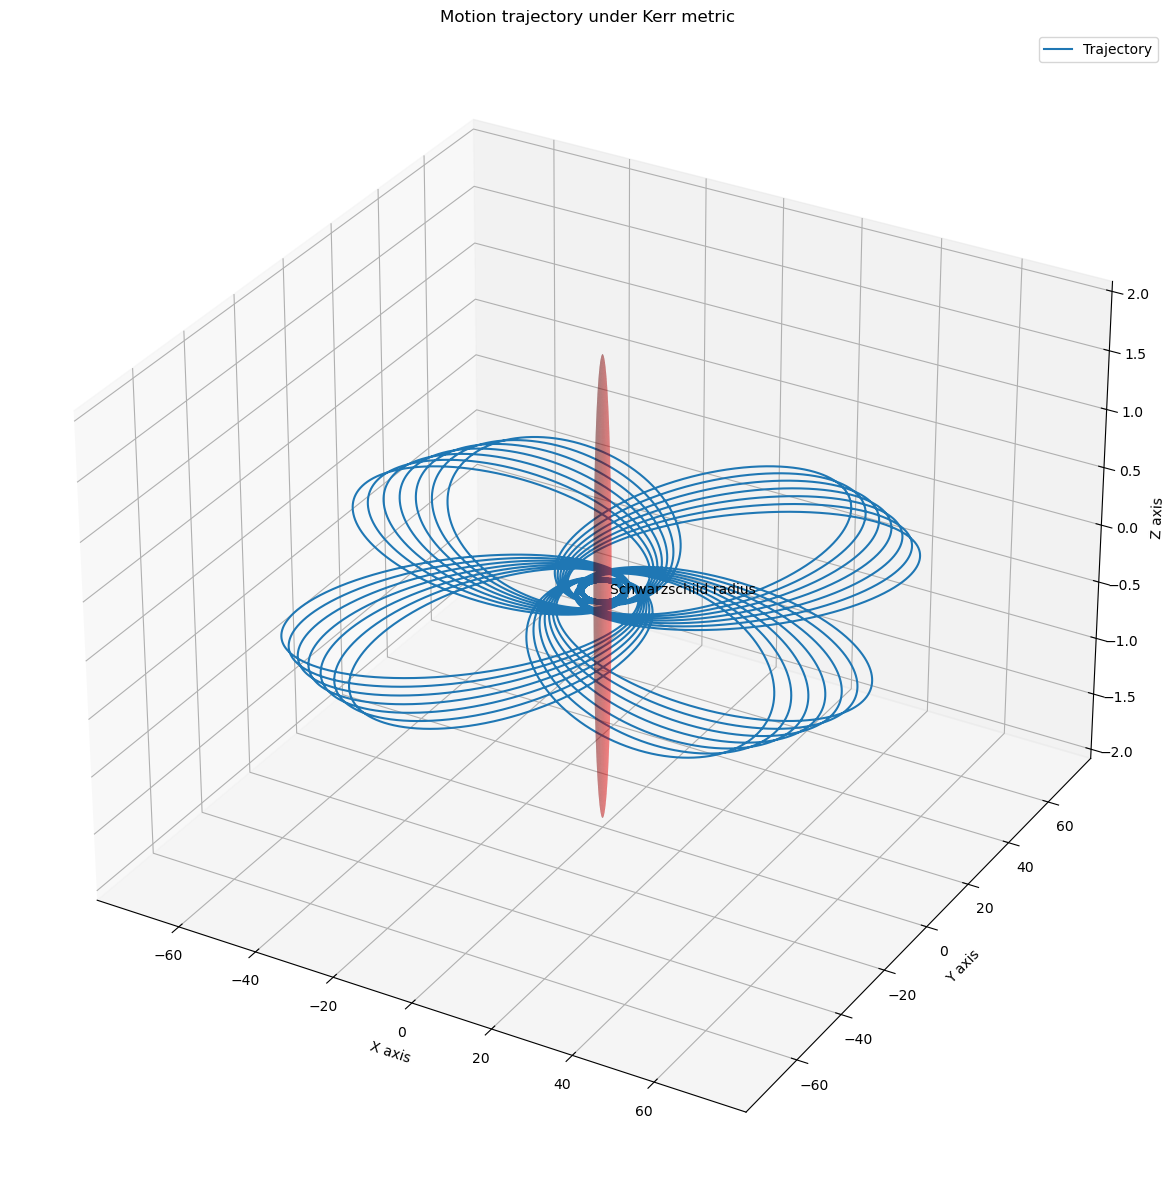

In [10]:
# 画图3d
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.3)
ax.plot(x, y, z, label='Trajectory')  # Trajectory
ax.text(2, 0, 0, "Schwarzschild radius", color='black')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Motion trajectory under Kerr metric')
# 调整三维轴的比例

ax.legend()
plt.show()

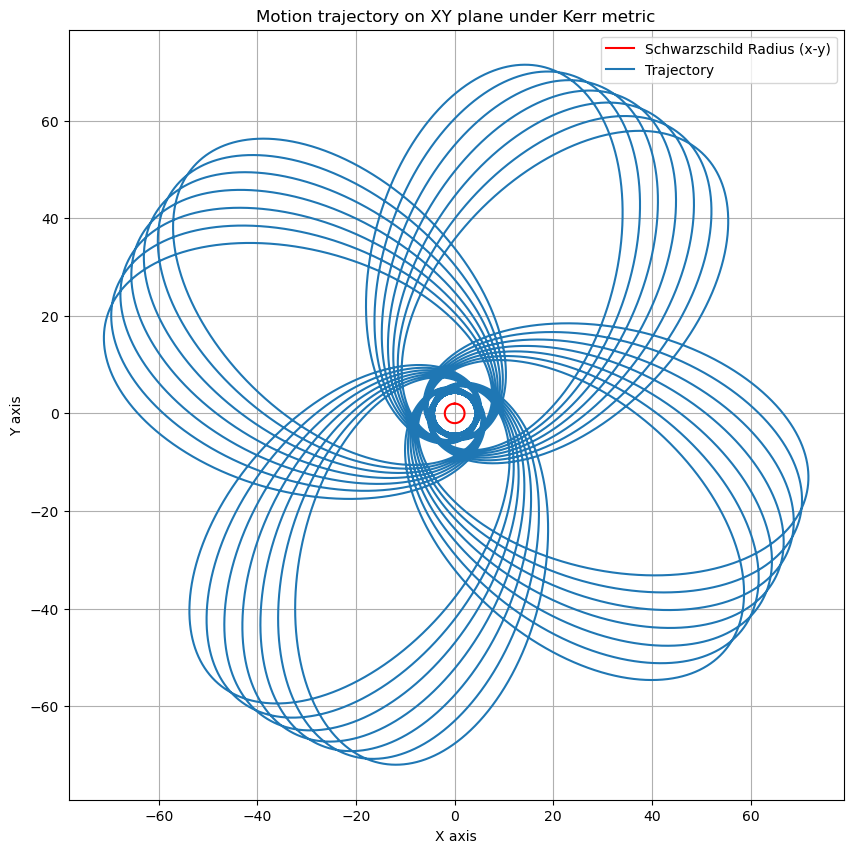

In [11]:
# x-y 平面
# 円の座標を設定
theta_circle = np.linspace(0, 2 * np.pi, 100)
x_circle = 2 * np.sin(theta_circle)
y_circle = 2 * np.cos(theta_circle)
# 画图
plt.figure(figsize=(10, 10))
plt.plot(x_circle, y_circle, color='red',label='Schwarzschild Radius (x-y)')
plt.plot(x, y, label='Trajectory')  # Trajectory on XY plane
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Motion trajectory on XY plane under Kerr metric')
plt.legend()
plt.grid(True)
plt.show()